# Data Science I - Projeto final

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [272]:
df = pd.read_csv('titanic-data-6.csv')

---

# Preparar dados (Wrangle data)

Consultar o formato do dataframe, número de linhas e colunas.

In [273]:
df.shape

(891, 12)

Consultar as primeiro cinco linhas do dataframe.

In [274]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Consultar informações como número de entradas, colunas e seus tipos de dados.

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Renomear as colunas

In [276]:
df.rename(
    columns={
        'PassengerId': 'id_passageiro', 
        'Survived': 'sobreviveu', 
        'Pclass':'classe', 
        'Name':'nome', 
        'Sex':'sexo', 
        'Age':'idade', 
        'SibSp':'irmao_conjuge', 
        'Parch':'pais_filhos', 
        'Ticket':'ticket', 
        'Fare':'tarifa', 
        'Cabin':'cabine',
        'Embarked': 'embarcou'
    }, inplace=True)

Verificar a existência de linhas duplicadas.

In [277]:
df.duplicated().sum()

0

Verificar se há nomes repetidos

In [278]:
df['nome'].duplicated().sum()

0

Verificar variedade de registros únicos em sexo

In [279]:
df['sexo'].nunique()

2

In [280]:
df['sexo'].unique()

array(['male', 'female'], dtype=object)

Tradução de valores de 'sexo'

In [281]:
pt_sex = {'male': 'Masculino', 'female':'Feminino'}
df['sexo'] = df['sexo'].replace(pt_sex.keys(), pt_sex.values())

In [282]:
df['sexo'].unique()

array(['Masculino', 'Feminino'], dtype=object)

Verificar variedade de registros únicos em sobreviventes

In [283]:
df['sobreviveu'].nunique()

2

In [284]:
df['sobreviveu'].unique()

array([0, 1], dtype=int64)

Substituição dos valores de sobreviventes de 0, 1 para 'Não' e 'Sim', respectivamente

In [285]:
pt_survived = {'0':'Não', '1':'Sim'}
df['sobreviveu'] = df['sobreviveu'].astype(str).replace(pt_survived.keys(), pt_survived.values())

In [286]:
df['sobreviveu'].head()

0    Não
1    Sim
2    Sim
3    Sim
4    Não
Name: sobreviveu, dtype: object

Verificar se existe valores nulos

In [287]:
df.isnull().any()

id_passageiro    False
sobreviveu       False
classe           False
nome             False
sexo             False
idade             True
irmao_conjuge    False
pais_filhos      False
ticket           False
tarifa           False
cabine            True
embarcou          True
dtype: bool

Foram encontrados valores nulos nas colunas 'idade', 'cabine' e 'embarcou'

Preenchimento de valores nulos em idade com seu valor médio

In [288]:
df['idade'].fillna(round(df['idade'].mean()), inplace=True)

Verificar os registros nulos em local de embarque (Embarked)

In [289]:
df['embarcou'].isnull().sum()

2

In [290]:
df[df['embarcou'].isnull()]

,id_passageiro,sobreviveu,classe,nome,sexo,idade,irmao_conjuge,pais_filhos,ticket,tarifa,cabine,embarcou
61,62,Sim,1,"Icard, Miss. Amelie",Feminino,38.0,0,0,113572,80.0,B28,NaN
829,830,Sim,1,"Stone, Mrs. George Nelson (Martha Evelyn)",Feminino,62.0,0,0,113572,80.0,B28,NaN


Verificar se existe passageiros sem local de embarque marcados como não sobreviventes

In [291]:
df[df['sobreviveu'] == 'Não']['embarcou'].isnull().any().sum()

0

Por não existir passageiros sem local de embarque marcado como não sobrevivente todos serão removidos, considerando que estes não estavam a bordo

In [292]:
df.dropna(subset=['embarcou'], inplace=True)

Validar a remoção de passageiros sem local de embarque

In [293]:
df['embarcou'].isnull().any().sum()

0

In [294]:
df.shape

(889, 12)

Listar os valores únicos para a coluna referente ao local em que o passageiro embarcou

In [295]:
df['embarcou'].unique()

array(['S', 'C', 'Q'], dtype=object)

Substituição do nome dos locais de embarque abreviados pelo nome completo

In [296]:
embarked_places = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['embarcou'].replace(embarked_places.keys(), embarked_places.values(), inplace=True)

Categorização das idades dos passageiros

In [297]:
ages = [0, 15, 25, 65, np.inf]
ages_categories = ['Criança', 'Jovem', 'Adulto', 'Idoso']

df['categoria_idade'] = pd.cut(df['idade'], bins=ages, labels=ages_categories,right=True)

Validar o resultado da classificação de idade

In [298]:
df['categoria_idade'].unique()

[Jovem, Adulto, Criança, Idoso]
Categories (4, object): [Criança < Jovem < Adulto < Idoso]

---

# Explorar (Explore)

Matriz de gráficos de dispersão para ideias

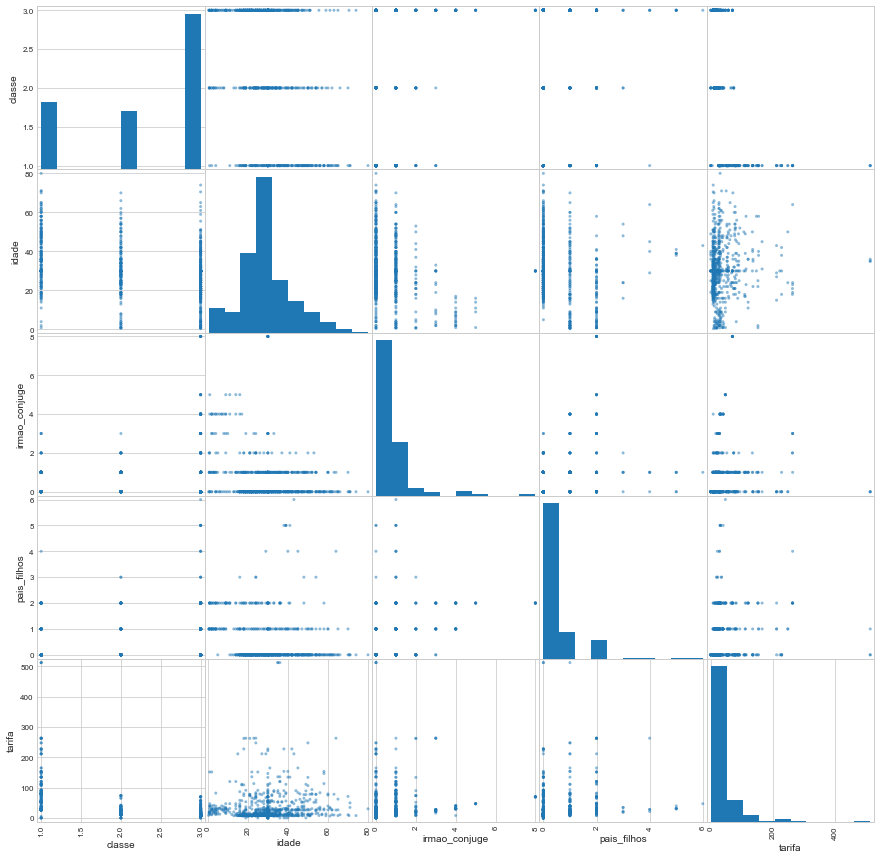

In [299]:
pd.plotting.scatter_matrix(df[['sobreviveu', 'classe', 'idade', 'irmao_conjuge', 'pais_filhos', 'tarifa']], figsize=(15,15));

In [300]:
df.head()

,id_passageiro,sobreviveu,classe,nome,sexo,idade,irmao_conjuge,pais_filhos,ticket,tarifa,cabine,embarcou,categoria_idade
0,1,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Jovem
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adulto
2,3,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adulto
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,Southampton,Adulto
4,5,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,Southampton,Adulto


---

# Configurações e funções

Definir estilo padrão para os gráficos com Seaborn

In [301]:
sns.set_style('whitegrid')

Definição de função para criar plot figure com título

In [302]:
def create_figure(title):
    """
        Criar uma figure com titulo posicionado
        
        Args:
            title (String): Valor a ser preenchido no título do gráfico 
            
        Return:
            (plt.Figure) Retorna uma Figure para adicionar gráficos (Plots)
    """
    fig = plt.figure(title)
    fig.suptitle(title, fontsize='x-large', horizontalalignment='center', verticalalignment='bottom')
    plt.subplots_adjust(top=.9)
    plt.tight_layout()
    fig.set_figwidth(20)
    
    return fig


---

# Perguntas

## 1. Quantos sobreviveram?

Tabela de contagem e proporção de sobreviventes e mortes

In [303]:
def get_survivors():
    """
        Exibir tabela com contagem de sobreviventes e proporção
        
        Return (dataframe)
    """
    # Definição do dataframe de proporções
    df_survivors = df['sobreviveu'].value_counts().reset_index()
    df_survivors.rename(columns={'index': 'sobreviveu', 'sobreviveu': 'total'}, inplace=True)
    df_survivors['proporcao'] = round(df_survivors['total'].apply(lambda value: value / df_survivors['total'].sum()) * 100, 2)
    
    return df_survivors

In [304]:
df_survivors = get_survivors()
df_survivors[df_survivors['sobreviveu'] == 'Sim']

,sobreviveu,total,proporcao
1,Sim,340,38.25


Definição de função para gráfico de pie para a proporção de sobreviventes

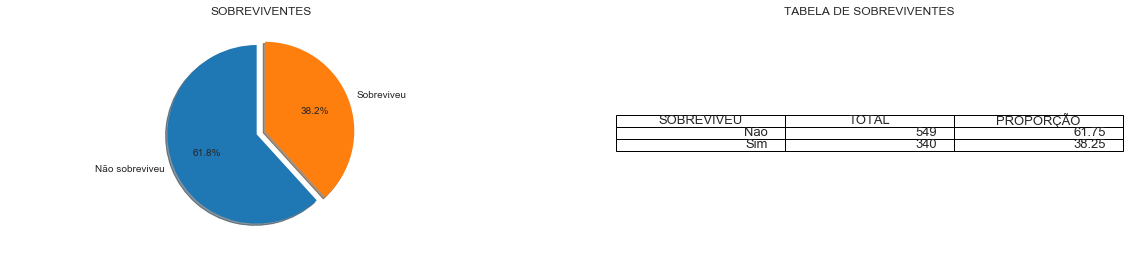

In [305]:
def plot_survivors():
    """
        Exibir pie plot de sobreviventes
    """
    df_survivors = get_survivors()
    fig = create_figure('')
    
    # pie plot
    ax_pie = fig.add_subplot(121)
    
    values = df_survivors['proporcao'] * 100
    explode = np.full(df_survivors.shape[0], 0.05)
    labels = df_survivors['sobreviveu'].replace(['Sim','Não'],['Sobreviveu', 'Não sobreviveu'])

    ax_pie.axis('equal')
    ax_pie.pie(
        values, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=True,
        startangle=90,
    );
    
    ax_pie.set_title('SOBREVIVENTES')
    
    # table plot
    ax_table = fig.add_subplot(122)
    table = ax_table.table(
        cellText = df_survivors.values,
        colLabels = ['SOBREVIVEU', 'TOTAL', 'PROPORÇÃO'],
        loc='center',        
    )
    ax_table.axis('off')
    ax_table.set_title('TABELA DE SOBREVIVENTES')
    table.auto_set_font_size(False)
    table.set_fontsize(13)
    
plot_survivors()

## 2. Quantos morreram?

Seleção dos que não sobreviveram no dataframe criado na questão anterior

In [306]:
df_survivors[df_survivors['sobreviveu'] == 'Não']

,sobreviveu,total,proporcao
0,Não,549,61.75


## 3. Quantas crianças sobreviveram?

In [307]:
df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts()

Sim    49
Não    34
Name: sobreviveu, dtype: int64

In [308]:
df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts(normalize=True)

Sim    0.590361
Não    0.409639
Name: sobreviveu, dtype: float64

49 crianças sobreviveram

## 4. Quantas crianças morreram?

In [309]:
df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts()

Sim    49
Não    34
Name: sobreviveu, dtype: int64

34 crianças morreram

Definição de função para criar gráfico de sobreviventes classificados como crianças 

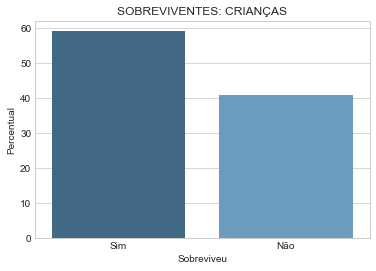

In [310]:
def plot_children_balance():
    """
        Gráfico de crianças sobreviventes e não sobreviventes
    """
    df_children = df.query('categoria_idade == "Criança"')['sobreviveu'].value_counts(normalize=True).to_frame().reset_index()
    df_children.rename(columns={'index': 'sobreviveu', 'sobreviveu': 'percentual'}, inplace=True)
    df_children['percentual'] = round(df_children['percentual'] * 100, 2)
    
    ax = sns.barplot(
        data = df_children,
        x = 'sobreviveu',
        y = 'percentual',
        palette = 'Blues_d',
    )
    
    plt.title('SOBREVIVENTES: CRIANÇAS')
    plt.xlabel('Sobreviveu')
    plt.ylabel('Percentual')
    
    
plot_children_balance()


## 5. Qual a idade média entre os sobreviventes?

Seleção dos sobreviventes e cáculo de idade média entre eles

In [311]:
df[df['sobreviveu'] == 'Sim']['idade'].mean()

28.469617647058822

Definição da função para imprimir a distribuição e média de idade

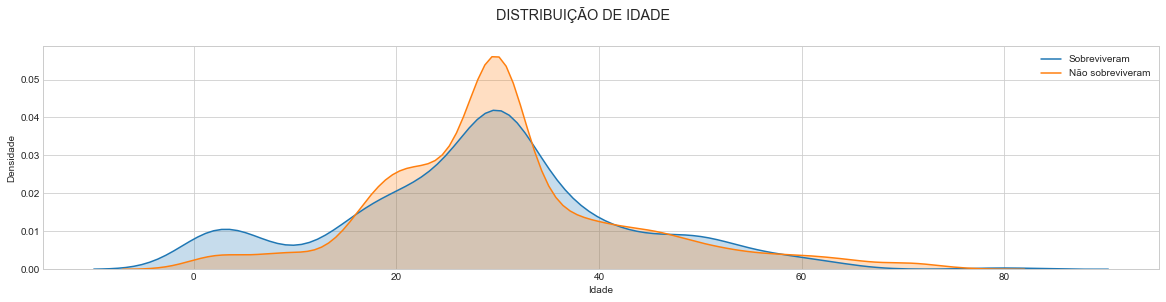

In [312]:
def plot_age_dist():
    """
        Gráfico de distribuição de idade
    """
    fig = create_figure('DISTRIBUIÇÃO DE IDADE')
    ax = fig.add_subplot(111)
    df_ages_surv = df[df['sobreviveu'] == 'Sim']['idade']
    df_ages_dead = df[df['sobreviveu'] == 'Não']['idade']
    
    sns.kdeplot(df_ages_surv, shade=True, label= 'Sobreviveram',)
    sns.kdeplot(df_ages_dead, shade=True, label='Não sobreviveram',)
    
    ax.set_xlabel('Idade')
    ax.set_ylabel('Densidade')
    
    
plot_age_dist()

## 6. Qual a idade média entre os que não sobreviveram?

In [313]:
round(df.query('sobreviveu == "Não"')['idade'].mean(),2)

30.48

## 7. Qual a relação dos sobreviventes com a classe de ingresso?

Pesquisa e normalização de sobreviventes por classe

In [314]:
df.groupby('classe')['sobreviveu'].value_counts(normalize=True)

classe  sobreviveu
1       Sim           0.626168
        Não           0.373832
2       Não           0.527174
        Sim           0.472826
3       Não           0.757637
        Sim           0.242363
Name: sobreviveu, dtype: float64

In [315]:
df.groupby('classe')['sobreviveu'].value_counts()

classe  sobreviveu
1       Sim           134
        Não            80
2       Não            97
        Sim            87
3       Não           372
        Sim           119
Name: sobreviveu, dtype: int64

,classe,sobreviveu,percentual
0,1,Sim,62.62
1,1,Não,37.38
2,2,Não,52.72
3,2,Sim,47.28
4,3,Não,75.76
5,3,Sim,24.24


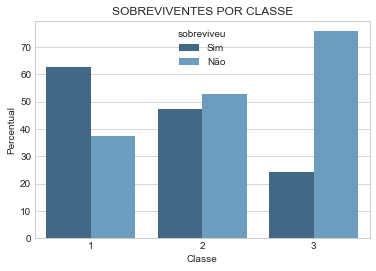

In [316]:
def plot_surv_by_class():
    """
        Gráfico de sobreviventes por classe
    """
    df_surv_by_class = df.groupby('classe')['sobreviveu'].value_counts(normalize=True).to_frame()
    df_surv_by_class.rename(columns={'sobreviveu':'percentual'}, inplace=True)
    df_surv_by_class.reset_index(inplace=True)
    df_surv_by_class['percentual'] = round(df_surv_by_class['percentual'] * 100, 2)

    ax = sns.barplot(
        data = df_surv_by_class,
        x = 'classe',
        y = 'percentual',
        hue = 'sobreviveu',
        palette = 'Blues_d',
    )

    plt.title('SOBREVIVENTES POR CLASSE')
    plt.xlabel('Classe')
    plt.ylabel('Percentual');
    
    return df_surv_by_class
    
plot_surv_by_class()

A classe que apresentou maior número de sobreviventes foi a primeira com 62,6%.

## 8. Qual o sexo mais relevante entre os sobreviventes?

In [317]:
df.query('sobreviveu == "Sim"')['sexo'].value_counts(normalize=True).reset_index()

,index,sexo
0,Feminino,0.679412
1,Masculino,0.320588


In [318]:
df.query('sobreviveu == "Sim" & sexo == "Feminino"')['classe'].value_counts()

1    89
3    72
2    70
Name: classe, dtype: int64

O gênero mais presente entre os sobreviventes é o feminino

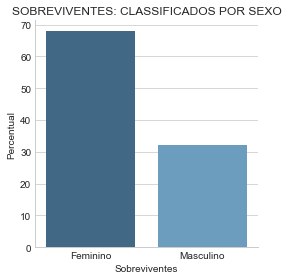

In [319]:
def sex_survivors_compare():
    """
        Exibir gráfico de comparação de sobreviventes do sexo masculino e feminino
    """
    columns = ['sexo', 'proporcao']
    df_surv = df.query('sobreviveu == "Sim"')['sexo'].value_counts(normalize=True).reset_index()
    df_surv.columns = columns
    df_surv['proporcao'] = round(df_surv['proporcao'] * 100, 2)
    
    ax = sns.factorplot(
        data = df_surv,
        x = 'sexo',
        y = 'proporcao',
        kind = 'bar',
        palette = 'Blues_d',
    );
    
    plt.title('SOBREVIVENTES: CLASSIFICADOS POR SEXO')
    plt.ylabel('Percentual')
    plt.xlabel('Sobreviventes')
    plt.tight_layout()

sex_survivors_compare()

## 9. Qual a relação dos sobreviventes com a classe e sexo?

In [320]:
df.groupby(['classe','sexo'])['sobreviveu'].value_counts(normalize=True)

classe  sexo       sobreviveu
1       Feminino   Sim           0.967391
                   Não           0.032609
        Masculino  Não           0.631148
                   Sim           0.368852
2       Feminino   Sim           0.921053
                   Não           0.078947
        Masculino  Não           0.842593
                   Sim           0.157407
3       Feminino   Não           0.500000
                   Sim           0.500000
        Masculino  Não           0.864553
                   Sim           0.135447
Name: sobreviveu, dtype: float64

As mulheres da primeira classe representaram a maior taxa de sobrevivência, 96,7% e a menor taxa de sobreviventes foi dos homens da terceira classe com apenas 13,5% de sobreviventes.

,classe,sexo,sobreviveu,percentual
0,1,Feminino,Sim,96.74
3,1,Masculino,Sim,36.89
4,2,Feminino,Sim,92.11
7,2,Masculino,Sim,15.74
9,3,Feminino,Sim,50.00
11,3,Masculino,Sim,13.54


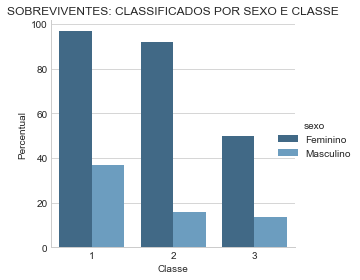

In [321]:
def plot_survivors_by_class_sex():
    """
        Exibir gráfico de sobreviventes por sexo e classe
    """
    df_surv = df.groupby(['classe','sexo'])['sobreviveu'].value_counts(normalize=True).to_frame()
    df_surv.columns = df_surv.columns.get_level_values(0)
    df_surv.rename(columns={'sobreviveu': 'percentual'}, inplace=True)
    df_surv['percentual'] = round(df_surv['percentual'] * 100, 2)
    df_surv.reset_index(inplace=True)
    
    ax = sns.factorplot(
        data = df_surv.query('sobreviveu == "Sim"'),
        x = 'classe',
        y = 'percentual',
        hue = 'sexo',
        kind = 'bar',
        palette = 'Blues_d',
    );
    
    plt.title('SOBREVIVENTES: CLASSIFICADOS POR SEXO E CLASSE')
    plt.ylabel('Percentual')
    plt.xlabel('Classe')
    plt.tight_layout() 
    
    return df_surv.query('sobreviveu == "Sim"')
    
plot_survivors_by_class_sex()


## 10. Qual ponto de embarque recebeu mais passageiros?

Calcular o volume de embarque para cada local.

In [322]:
df['embarcou'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embarcou, dtype: int64

Exibir o ponto com maior frequência

In [323]:
df['embarcou'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embarcou, dtype: object

O ponto de embarque que recebeu mais passageiros foi Southampton

## 11. Do sexo masculino, qual é a idade do sobrevivente mais velho?

In [324]:
df.query('sobreviveu == "Sim" & sexo == "Masculino"').idade.max()

80.0

## 12. Do sexo masculino, qual é a idade do sobrevivente mais novo?

In [325]:
df.query('sobreviveu == "Sim" & sexo == "Masculino"').idade.min()

0.42

## 13. Do sexo feminino, qual é a idade da sobrevivente mais velha?

In [326]:
df.query('sobreviveu == "Sim" & sexo == "Feminino"').idade.max()

63.0

## 14. Do sexo feminino, qual é a idade da sobrevivente mais nova?

In [327]:
df.query('sobreviveu == "Sim" & sexo == "Feminino"').idade.min()

0.75

---

# Conclusão

Ao analisar a amostra de dados de passageiros do Titanic, foi possível chegar as seguintes conclusões.
- A primeira classe apresentou o maior percentual de sobreviventes, com 62,6%, contra 47,2% da segunda e 24,2% da terceira. Tal diferença pode apontar que houve alguma facilidade ou favorecimento no acesso aos botes salva vidas para os passageiros da primeira classe.
- Dentre os sobreviventes, 68% são mulheres e 32% homens
- O grupo de classe e sexo que apresentou maior taxa de sobreviventes foi o feminino da primeira classe, com a relação de 96,7%
- 59,0% das crianças a bordo foram salvas
- A idade média entre os sobreviventes era de 28,4 anos.

# Limitações

Inicialmente ao avaliar o conjunto de dados foi detectado que haviam campos como idade, embarcou e cabine, não preenchidos e que potencialmente prejudicariam a análise. 
Assim, foram feitos alguns ajustes como:
- Campos de idade com valor nulo foram preenchidos com a média
- Foi efetuada uma breve análise sobre os passageiros que apresentavam o campo 'embarcou' como nulo e se haviam sobrevivido, assim, dado que o retorno foi positivo, estes foram removidos do conjunto de dados considerando que estes não embarcaram.

Valores abreviados em local de embarque (embarcou) foram substituídos pelo nome do local sem abreviação.

Foram aplicadas traduções nos nomes das colunas e nos valores dos campos sobreviveu e sexo para auxiliar na criação de legendas dos gráficos.

Foi criado um campo de categorização da idade dos passageiros com o objetivo de mapea-los facilmente e levantar informações a respeito de cada grupo.

---

# Apresentação

Mesmo após um século de seu naufrágio, que ocorreu em 1912, o Titanic é considerado um dos maiores desastres marítimos em tempos de paz. Sua história rendeu livros, filmes e diversos documentarios que buscam explorar e levar informações e curiosidades a seu respeito ao público. Nesse mesmo sentido, esse projeto tem como objetivo explorar o conjunto de dados do Titanic e tentar responder uma série de perguntas pertinentes. O arquivo está disponível no formato CSV através do [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv).

No primeiro instante, ao carregar o conjunto de dados, foi necessario avaliar suas características como, seu esquema de organização, consistência dos dados e a necessidade possíveis correções e adaptações que pudessem contribuir na manipulação e pesquisa. Neste passo foram aplicadas as seguintes mudanças: 
- Nomes de colunas e valores foram traduzidos para o português de modo que ficassem no mesmo idioma da análise;
- Valores nulos na coluna 'idade' foram preenchidos com o valor médio;
- Passageiros foram classificados por idade como Criança, menores de 15 anos, Jovem, entre 15 e 25, Adulto, entre 25 e 65, e Idoso para maiores de 65 anos;
- Valores abreviados na coluna 'embarcou' foram substituidos pelo nome correspondente sem abreviação;
- Passageiros que sobreviveram e não possuiam local de embarque foram removidos do conjunto, considerando que não embarcaram;


Feito isso, foram levantadas perguntas das quais poderiam ser respondidas com o conjunto de dados disponível, são elas:
1. Quantos sobreviveram?
2. Quantos morreram?
3. Quantas crianças sobreviveram?
4. Quantas crianças morreram?
5. Qual a idade média entre os sobreviventes?
6. Qual a idade média entre os que morreram?
7. Qual a relação dos sobreviventes com a classe de ingresso?
8. Qual o sexo mais relevante entre os sobreviventes?
9. Qual a relação dos sobreviventes com a classe e sexo?
10. Qual ponto de embarque recebeu mais passageiros?
11. Do sexo masculino, qual é a idade do sobrevivente mais velho?
12. Do sexo masculino, qual é a idade do sobrevivente mais novo?
13. Do sexo feminino, qual é a idade da sobrevivente mais velha?
14. Do sexo feminino, qual é a idade da sobrevivente mais nova?

## Perguntas

### 1 e 2, Quantos sobreviveram e quantos morreram? 

Complementares, a primeira e a segunda pergunta foram respondidas ao agrupar os dados por tipo de valor na coluna 'sobreviveu' e apontam que, conforme a tabela e gráfico abaixo, 340 (38,25%) pessoas sobreviveram e outras 549 (61,75%) morreram.

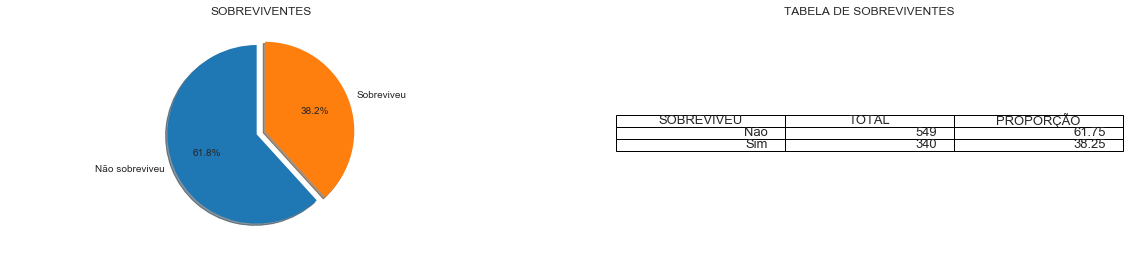

In [328]:
plot_survivors()

### 3 e 4, Quantas crianças sobreviveram e quantas morreram?

Para as perguntas três e quatro, que também são complementares, foram filtrados os registros que apresentavam o valor 'Criança' na coluna 'categoria_idade' para posteriormente contabilizar os valores de sobreviventes.

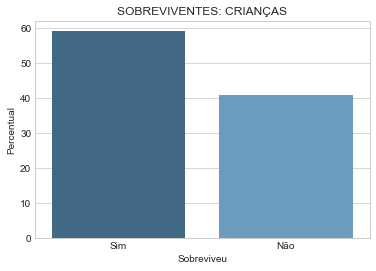

In [329]:
plot_children_balance()

### 5 e 6, Qual a idade média entre os sobreviventes? E entre os que não sobreviveram? 

Os sobreviventes aprensentavam idade média de 28,47 anos e os que não sobreviveram com 30,48. Ambos aprensetaram um pico de densidade de passageiros entre 20 e 40 anos, sendo de sobreviventes levemente superior a 4% e dos não sobreviventes superior a 5%.

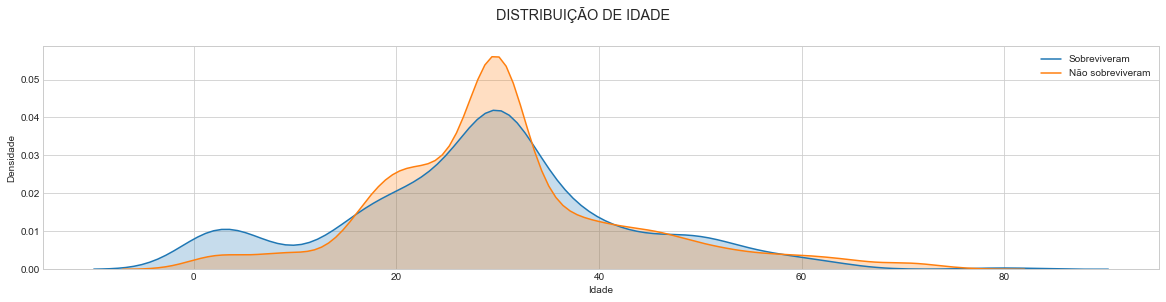

In [330]:
plot_age_dist()

### 7. Qual a relação dos sobreviventes com a classe de ingresso?

A classe que apresentou maior número de sobreviventes foi a primeira com 62,62%, seguida da segunda classe com 52,72% e a terceira classe com 24,24%. Podemos concluir que algum fator, possivelmente, favoreceu os passageiros da primeira classe no acesso aos botes salva vidas.

,classe,sobreviveu,percentual
0,1,Sim,62.62
1,1,Não,37.38
2,2,Não,52.72
3,2,Sim,47.28
4,3,Não,75.76
5,3,Sim,24.24


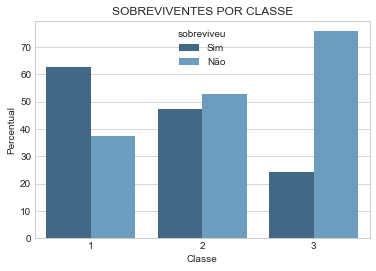

In [331]:
plot_surv_by_class()

### 8. Qual o sexo mais relevante entre os sobreviventes?

O sexo mais relevante entre os sobreviventes é o feminino com 67,94%.

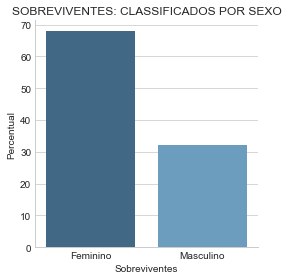

In [332]:
sex_survivors_compare()

In [333]:
df.query('sobreviveu == "Sim"')['sexo'].value_counts(normalize=True)

Feminino     0.679412
Masculino    0.320588
Name: sexo, dtype: float64

### 9. Qual a relação dos sobreviventes com a classe e sexo? 

Ao analisarmos a proporção de sobreviventes por gênero e classe é possível notar como as mulheres da primeira e segunda se destacam em relação a seu grupo. Sobreviveram, 96,74% das mulheres da primeira classe e 92,11% das mulheres da segunda classe, ao passo que a proporção de homens, respectivamente, foi de 36,89% e 15,74%. 
O gênero que apresentou pior proporção foi o masculino na terceira classe com apenas 13,54% de sobreviventes.

,classe,sexo,sobreviveu,percentual
0,1,Feminino,Sim,96.74
3,1,Masculino,Sim,36.89
4,2,Feminino,Sim,92.11
7,2,Masculino,Sim,15.74
9,3,Feminino,Sim,50.00
11,3,Masculino,Sim,13.54


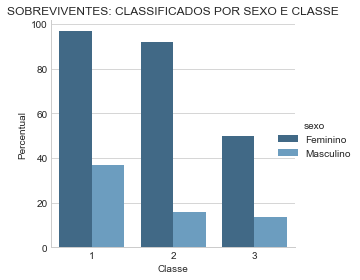

In [334]:
plot_survivors_by_class_sex()

### 10. Qual ponto de embarque recebeu mais passageiros?

In [335]:
df['embarcou'].value_counts().to_frame()

,embarcou
Southampton,644
Cherbourg,168
Queenstown,77


O ponto de embarque que recebeu mais passageiros foi de Southampton, ao sul do Reino Unido e também ponto de partida do navio.

## 11. Do sexo masculino, qual é a idade do sobrevivente mais velho?

In [336]:
df.query('sobreviveu == "Sim" & sexo == "Masculino"').idade.max()

80.0

O sobrevivente mais velho do sexo masculino tinha 80 anos.

## 12. Do sexo masculino, qual é a idade do sobrevivente mais novo?

In [337]:
df.query('sobreviveu == "Sim" & sexo == "Masculino"').idade.min()

0.42

O sobrevivente mais novo do sexo masculino tinha 0.42 ano (5 meses);

## 13. Do sexo feminino, qual é a idade da sobrevivente mais velha?

In [338]:
df.query('sobreviveu == "Sim" & sexo == "Feminino"').idade.max()

63.0

A sobrevivente mais velha do sexo feminino tinha 63 anos.

## 14. Do sexo feminino, qual é a idade da sobrevivente mais nova?

In [339]:
df.query('sobreviveu == "Sim" & sexo == "Feminino"').idade.min()

0.75

A sobrevivente mais nova do sexo feminino tinha 0.75 ano (9 meses).

## Fim

Este é um projeto aberto, não tem como objetivo encontrar respostas definitivas. Há várias perguntas a serem feitas, campos e outros conjuntos de dados a serem explorados que podem esclarecer mais sobre este desastre marítimo que levou consigo tantas vidas.


---

# Consultas e referências

- [Seaborn API documentation](https://seaborn.pydata.org/api.html)
- [Stack Overflow: Seaborn](https://stackoverflow.com/questions/33524694/plotting-with-seaborn)
- [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Stack Overflow: Pandas](https://stackoverflow.com/questions/tagged/pandas)
- [Matplotlib documentation](https://matplotlib.org/contents.html)



